# Analyzing the Battlefield: An Introduction to Age of Empires 2 Player and Match File Analysis

Age of Empires 2, a classic in the real-time strategy genre, offers a wealth of data for those seeking to delve beyond the in-game experience. Player and match files, commonly in the form of recorded games (replays).

With this data we can analyse post April 2025 Patch to see what the new meta is - what the ideal civilisation is for each map and what match ups are the best.


In [2]:
import pandas as pd
matches = pd.read_parquet('matches/matches-2025-04-20.parquet', engine='pyarrow')
matches.head()

,map,started_timestamp,duration,irl_duration,game_id,avg_elo,num_players,team_0_elo,team_1_elo,replay_enhanced,leaderboard,mirror,patch,raw_match_type,game_type,game_speed,starting_age
0,arena,2025-04-20 00:28:18+00:00,0 days 00:56:31.500000,0 days 00:33:15,386727054,855.666667,6,861.333333,850.00,False,team_random_map,False,141935,8,random_map,normal,dark
1,arabia,2025-04-20 00:42:28+00:00,0 days 00:44:08.600000,0 days 00:25:58,386729359,672.000000,2,656.000000,688.00,False,random_map,False,141935,6,random_map,normal,dark
2,black_forest,2025-04-20 01:01:00+00:00,0 days 00:09:04,0 days 00:05:20,386732189,1319.250000,8,1331.250000,1307.25,False,team_random_map,False,141935,9,random_map,normal,dark
3,lombardia,2025-04-20 00:21:24+00:00,0 days 00:58:57.700000,0 days 00:34:41,386725843,1058.000000,6,1085.000000,1031.00,False,team_random_map,False,141935,8,random_map,normal,dark
4,arena,2025-04-20 00:35:34+00:00,0 days 00:52:31.800000,0 days 00:30:54,386728263,1076.000000,2,1081.000000,1071.00,False,random_map,False,141935,6,random_map,normal,dark


In [3]:
players = pd.read_parquet('players/players-2025-04-20.parquet', engine='pyarrow')
players.head()

,winner,game_id,team,feudal_age_uptime,castle_age_uptime,imperial_age_uptime,old_rating,new_rating,match_rating_diff,replay_summary_raw,profile_id,civ,opening
0,False,386832217,1,None,None,None,1732,1715,20.00,{},289834,dravidians,None
1,True,386724244,0,None,None,None,1480,1498,-49.00,{},2992198,georgians,None
2,False,386724244,1,None,None,None,1529,1511,49.00,{},276037,cumans,None
3,True,386723486,0,None,None,None,1311,1325,-38.75,{},2145836,magyars,None
4,False,386723486,1,None,None,None,1289,1270,38.75,{},289030,spanish,None


In [4]:
matches.info() #Here we can see that there is 196533 rows but we need to remove mirror

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196533 entries, 0 to 196532
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   map                196533 non-null  object             
 1   started_timestamp  196533 non-null  datetime64[ns, UTC]
 2   duration           196533 non-null  timedelta64[ns]    
 3   irl_duration       196533 non-null  timedelta64[ns]    
 4   game_id            196533 non-null  object             
 5   avg_elo            196533 non-null  float64            
 6   num_players        196533 non-null  int64              
 7   team_0_elo         196533 non-null  float64            
 8   team_1_elo         196533 non-null  float64            
 9   replay_enhanced    196533 non-null  bool               
 10  leaderboard        196533 non-null  object             
 11  mirror             196533 non-null  bool               
 12  patch              196533 non-

In [5]:
matches = matches[matches['mirror'] == False]
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192372 entries, 0 to 196532
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   map                192372 non-null  object             
 1   started_timestamp  192372 non-null  datetime64[ns, UTC]
 2   duration           192372 non-null  timedelta64[ns]    
 3   irl_duration       192372 non-null  timedelta64[ns]    
 4   game_id            192372 non-null  object             
 5   avg_elo            192372 non-null  float64            
 6   num_players        192372 non-null  int64              
 7   team_0_elo         192372 non-null  float64            
 8   team_1_elo         192372 non-null  float64            
 9   replay_enhanced    192372 non-null  bool               
 10  leaderboard        192372 non-null  object             
 11  mirror             192372 non-null  bool               
 12  patch              192372 non-null 

In [6]:
#We can see that we lost around 4000 entries. Lets join player on matches
joined_df = pd.merge(players,matches,on='game_id',how='inner')
joined_df.head(10)

,winner,game_id,team,feudal_age_uptime,castle_age_uptime,imperial_age_uptime,old_rating,new_rating,match_rating_diff,replay_summary_raw,...,team_0_elo,team_1_elo,replay_enhanced,leaderboard,mirror,patch,raw_match_type,game_type,game_speed,starting_age
0,False,386832217,1,None,None,None,1732,1715,20.00,{},...,1712.00,1732.0,False,random_map,False,141935,6,random_map,normal,dark
1,True,386724244,0,None,None,None,1480,1498,-49.00,{},...,1480.00,1529.0,False,random_map,False,141935,6,random_map,normal,dark
2,False,386724244,1,None,None,None,1529,1511,49.00,{},...,1480.00,1529.0,False,random_map,False,141935,6,random_map,normal,dark
3,True,386723486,0,None,None,None,1311,1325,-38.75,{},...,1219.25,1258.0,False,team_random_map,False,141935,9,random_map,normal,dark
4,False,386723486,1,None,None,None,1289,1270,38.75,{},...,1219.25,1258.0,False,team_random_map,False,141935,9,random_map,normal,dark
5,True,386723486,0,None,None,None,1347,1359,-38.75,{},...,1219.25,1258.0,False,team_random_map,False,141935,9,random_map,normal,dark
6,False,386723486,1,None,None,None,1257,1239,38.75,{},...,1219.25,1258.0,False,team_random_map,False,141935,9,random_map,normal,dark
7,True,386723486,0,None,None,None,1173,1193,-38.75,{},...,1219.25,1258.0,False,team_random_map,False,141935,9,random_map,normal,dark
8,False,386723486,1,None,None,None,1235,1218,38.75,{},...,1219.25,1258.0,False,team_random_map,False,141935,9,random_map,normal,dark
9,True,386723486,0,None,None,None,1046,1071,-38.75,{},...,1219.25,1258.0,False,team_random_map,False,141935,9,random_map,normal,dark


Because I am looking at 1v1 (non mirror) ranked I need to do some filtering.

In [8]:
one_one = joined_df['num_players'] == 2
mirror = joined_df['mirror'] == True
stats = joined_df[~mirror & one_one].copy()
stats.mirror.nunique() #this should show that the mirror should only have one unique value = false as I used bitwise negation

1

In [9]:
stats

,winner,game_id,team,feudal_age_uptime,castle_age_uptime,imperial_age_uptime,old_rating,new_rating,match_rating_diff,replay_summary_raw,...,team_0_elo,team_1_elo,replay_enhanced,leaderboard,mirror,patch,raw_match_type,game_type,game_speed,starting_age
0,False,386832217,1,None,None,None,1732,1715,20.0,{},...,1712.0,1732.0,False,random_map,False,141935,6,random_map,normal,dark
1,True,386724244,0,None,None,None,1480,1498,-49.0,{},...,1480.0,1529.0,False,random_map,False,141935,6,random_map,normal,dark
2,False,386724244,1,None,None,None,1529,1511,49.0,{},...,1480.0,1529.0,False,random_map,False,141935,6,random_map,normal,dark
17,False,386725678,0,None,None,None,1130,1114,-5.0,{},...,1130.0,1135.0,False,random_map,False,141935,6,random_map,normal,dark
18,True,386725678,1,None,None,None,1135,1151,5.0,{},...,1130.0,1135.0,False,random_map,False,141935,6,random_map,normal,dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668426,True,388308574,1,None,None,None,702,717,22.0,{},...,680.0,702.0,False,random_map,False,141935,6,random_map,normal,dark
668427,False,388270503,0,None,None,None,566,542,0.0,{},...,566.0,566.0,False,random_map,False,141935,6,random_map,normal,dark
668428,True,388270503,1,None,None,None,566,593,0.0,{},...,566.0,566.0,False,random_map,False,141935,6,random_map,normal,dark
668429,True,388180110,0,None,None,None,966,983,-15.0,{},...,966.0,981.0,False,random_map,False,141935,6,random_map,normal,dark


In [10]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240224 entries, 0 to 668430
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   winner               240224 non-null  bool               
 1   game_id              240224 non-null  object             
 2   team                 240224 non-null  int64              
 3   feudal_age_uptime    0 non-null       object             
 4   castle_age_uptime    0 non-null       object             
 5   imperial_age_uptime  0 non-null       object             
 6   old_rating           240224 non-null  int64              
 7   new_rating           240224 non-null  int64              
 8   match_rating_diff    240224 non-null  float64            
 9   replay_summary_raw   240224 non-null  object             
 10  profile_id           240224 non-null  int64              
 11  civ                  240224 non-null  object             
 12  opening

In [11]:
win_Players = stats['winner'] == True
winners = stats[win_Players]
winners

,winner,game_id,team,feudal_age_uptime,castle_age_uptime,imperial_age_uptime,old_rating,new_rating,match_rating_diff,replay_summary_raw,...,team_0_elo,team_1_elo,replay_enhanced,leaderboard,mirror,patch,raw_match_type,game_type,game_speed,starting_age
1,True,386724244,0,None,None,None,1480,1498,-49.0,{},...,1480.0,1529.0,False,random_map,False,141935,6,random_map,normal,dark
18,True,386725678,1,None,None,None,1135,1151,5.0,{},...,1130.0,1135.0,False,random_map,False,141935,6,random_map,normal,dark
19,True,386723992,0,None,None,None,1109,1126,-24.0,{},...,1109.0,1133.0,False,random_map,False,141935,6,random_map,normal,dark
22,True,386723747,1,None,None,None,1283,1299,5.0,{},...,1278.0,1283.0,False,random_map,False,141935,6,random_map,normal,dark
24,True,386723322,1,None,None,None,1196,1212,6.0,{},...,1190.0,1196.0,False,random_map,False,141935,6,random_map,normal,dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668422,True,387722747,1,None,None,None,1008,1042,8.0,{},...,1000.0,1008.0,False,co_random_map,False,141935,66,random_map,normal,dark
668424,True,388323281,1,None,None,None,702,718,7.0,{},...,695.0,702.0,False,random_map,False,141935,6,random_map,normal,dark
668426,True,388308574,1,None,None,None,702,717,22.0,{},...,680.0,702.0,False,random_map,False,141935,6,random_map,normal,dark
668428,True,388270503,1,None,None,None,566,593,0.0,{},...,566.0,566.0,False,random_map,False,141935,6,random_map,normal,dark


In [12]:
civ_count = winners['civ'].value_counts()
print(civ_count.sort_values(ascending=False))

civ
mongols        7090
franks         5697
magyars        4217
persians       3929
ethiopians     3822
khmer          3653
teutons        3566
britons        3557
spanish        3345
japanese       3295
goths          3129
lithuanians    3106
huns           3103
aztecs         3036
hindustanis    2873
turks          2802
vietnamese     2801
bulgarians     2759
byzantines     2734
chinese        2691
celts          2617
mayans         2571
malians        2408
cumans         2318
sicilians      2276
bohemians      2270
koreans        2269
portuguese     2261
romans         2225
vikings        2186
italians       2094
burgundians    2064
incas          2059
armenians      2038
slavs          1949
saracens       1917
poles          1907
berbers        1751
malay          1694
georgians      1668
tatars         1644
burmese        1244
gurjaras       1177
dravidians     1174
bengalis       1123
Name: count, dtype: int64


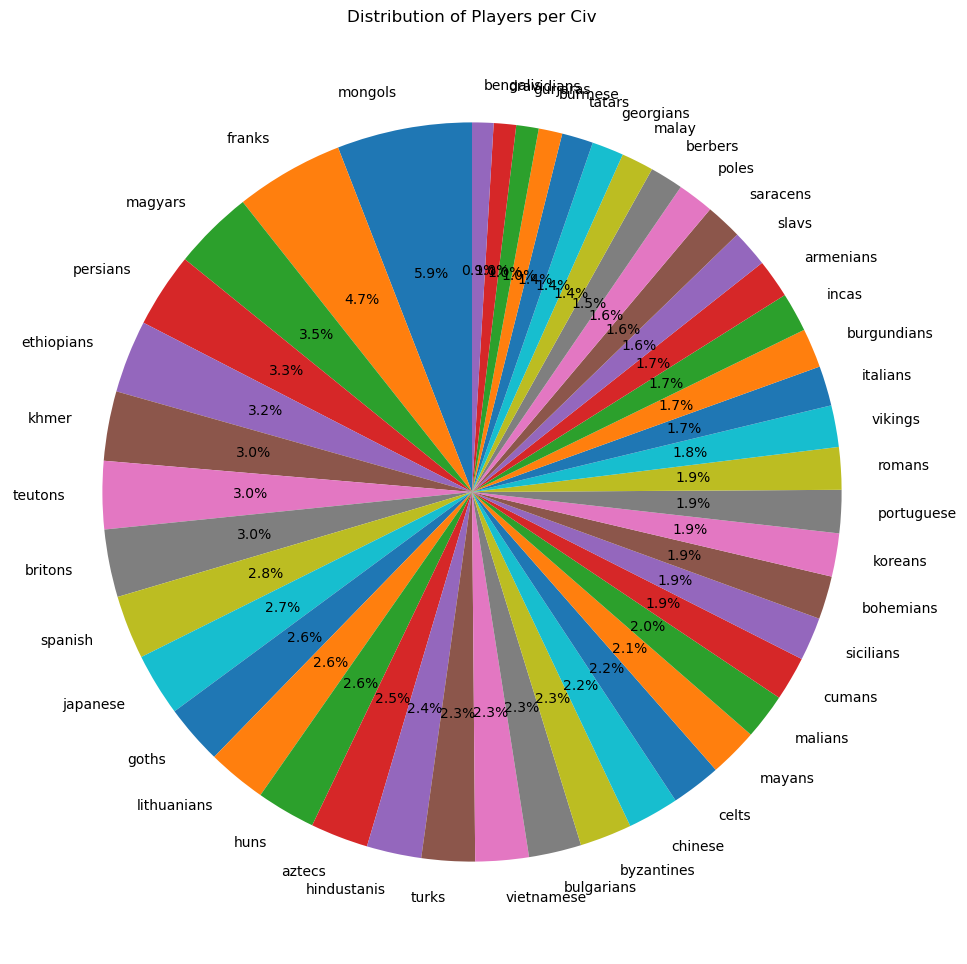

In [13]:

import matplotlib.pyplot as plt

# Plot a pie chart
plt.figure(figsize=(12, 12))
civ_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Players per Civ')
plt.ylabel('') # Remove default 'civ' label
plt.show()

In [14]:
stats.drop(labels = 'feudal_age_uptime', axis = 1) #axis 1 is columns

,winner,game_id,team,castle_age_uptime,imperial_age_uptime,old_rating,new_rating,match_rating_diff,replay_summary_raw,profile_id,...,team_0_elo,team_1_elo,replay_enhanced,leaderboard,mirror,patch,raw_match_type,game_type,game_speed,starting_age
0,False,386832217,1,None,None,1732,1715,20.0,{},289834,...,1712.0,1732.0,False,random_map,False,141935,6,random_map,normal,dark
1,True,386724244,0,None,None,1480,1498,-49.0,{},2992198,...,1480.0,1529.0,False,random_map,False,141935,6,random_map,normal,dark
2,False,386724244,1,None,None,1529,1511,49.0,{},276037,...,1480.0,1529.0,False,random_map,False,141935,6,random_map,normal,dark
17,False,386725678,0,None,None,1130,1114,-5.0,{},4321928,...,1130.0,1135.0,False,random_map,False,141935,6,random_map,normal,dark
18,True,386725678,1,None,None,1135,1151,5.0,{},3209723,...,1130.0,1135.0,False,random_map,False,141935,6,random_map,normal,dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668426,True,388308574,1,None,None,702,717,22.0,{},19979854,...,680.0,702.0,False,random_map,False,141935,6,random_map,normal,dark
668427,False,388270503,0,None,None,566,542,0.0,{},10126422,...,566.0,566.0,False,random_map,False,141935,6,random_map,normal,dark
668428,True,388270503,1,None,None,566,593,0.0,{},22638443,...,566.0,566.0,False,random_map,False,141935,6,random_map,normal,dark
668429,True,388180110,0,None,None,966,983,-15.0,{},3295962,...,966.0,981.0,False,random_map,False,141935,6,random_map,normal,dark


In [15]:
#Can also drop multiple columns at the same time
stats.drop(labels = ['castle_age_uptime', 'imperial_age_uptime','replay_enhanced','replay_summary_raw'],axis = 'columns')

,winner,game_id,team,feudal_age_uptime,old_rating,new_rating,match_rating_diff,profile_id,civ,opening,...,num_players,team_0_elo,team_1_elo,leaderboard,mirror,patch,raw_match_type,game_type,game_speed,starting_age
0,False,386832217,1,None,1732,1715,20.0,289834,dravidians,None,...,2,1712.0,1732.0,random_map,False,141935,6,random_map,normal,dark
1,True,386724244,0,None,1480,1498,-49.0,2992198,georgians,None,...,2,1480.0,1529.0,random_map,False,141935,6,random_map,normal,dark
2,False,386724244,1,None,1529,1511,49.0,276037,cumans,None,...,2,1480.0,1529.0,random_map,False,141935,6,random_map,normal,dark
17,False,386725678,0,None,1130,1114,-5.0,4321928,dravidians,None,...,2,1130.0,1135.0,random_map,False,141935,6,random_map,normal,dark
18,True,386725678,1,None,1135,1151,5.0,3209723,vikings,None,...,2,1130.0,1135.0,random_map,False,141935,6,random_map,normal,dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668426,True,388308574,1,None,702,717,22.0,19979854,franks,None,...,2,680.0,702.0,random_map,False,141935,6,random_map,normal,dark
668427,False,388270503,0,None,566,542,0.0,10126422,goths,None,...,2,566.0,566.0,random_map,False,141935,6,random_map,normal,dark
668428,True,388270503,1,None,566,593,0.0,22638443,mongols,None,...,2,566.0,566.0,random_map,False,141935,6,random_map,normal,dark
668429,True,388180110,0,None,966,983,-15.0,3295962,chinese,None,...,2,966.0,981.0,random_map,False,141935,6,random_map,normal,dark


In [16]:
civ_to_type_map = {
    'armenians' : 'Infantry & Naval',
    'aztecs' :'Infantry & Monk',
    'bengalis' : 'Elephant & Naval',
    'berbers' :'Cavalry & Naval',
    'bohemains' : 'Gunpowder & Monk',
    'britons' :'Archer',
    'bulgarians' : 'Infantry',
    'burgundians' :'Cavalry',
    'burmese' : 'Monk & Elephant',
    'byzantines': 'Defensive',
    'celts' : 'Infantry & Siege',
    'chinese' : 'Archer & Gunpowder',
    'cumans' : 'Cavalry',
    'dravidians' : 'Infantry & Naval',
    'ethiopians' : 'Archer',
    'franks' : 'Cavalry',
    'georgians' : 'Cavalry & Defensive',
    'goths' : 'Infantry',
    'gurjaras' : 'Cavalry',
    'hindustanis' : 'Camel & Gunpowder',
    'huns' : 'Cavalry',
    'inca' : 'Infantry',
    'italians' : 'Archer & Navy',
    'japanese' : 'Infantry',
    'jurchens' : 'Cavalry & Gunpowder',
    'khitans' : 'Infantry & Cavalry',
    'khmer' : 'Siege & Elephant',
    'koreans' : 'Defensive & Naval',
    'lithuanians' : 'Cavalry',
    'magyars' : 'Cavalry',
    'malay' : 'Infantry & Naval',
    'malians' : 'Infantry',
    'maya' : 'Archer',
    'mongols' : 'Cavalry Archer',
    'persians' : 'Cavalry',
    'poles' : 'Cavalry',
    'portuguese' : 'Naval & Gunpowder',
    'romans' : 'Infantry',
    'saracens' : 'Camel & Naval',
    'shu' : 'Archer & Siege',
    'sicilians' : 'Infantry & Cavalry',
    'slavs' : 'Infantry',
    'spanish' : 'Gunpowder & Monk',
    'tatars' : 'Cavalry Archer',
    'teutons' : 'Infantry',
    'turks' : 'Gunpowder',
    'vietnamese' : 'Archer',
    'vikings' : 'Infantry & Naval',
    'wei' : 'Cavalry',
    'wu' : 'Infantry & Naval'
}

In [17]:
stats['type_of_civ'] = stats['civ'].map(civ_to_type_map)
stats['type_of_civ'] = stats['type_of_civ'].fillna('Pass')


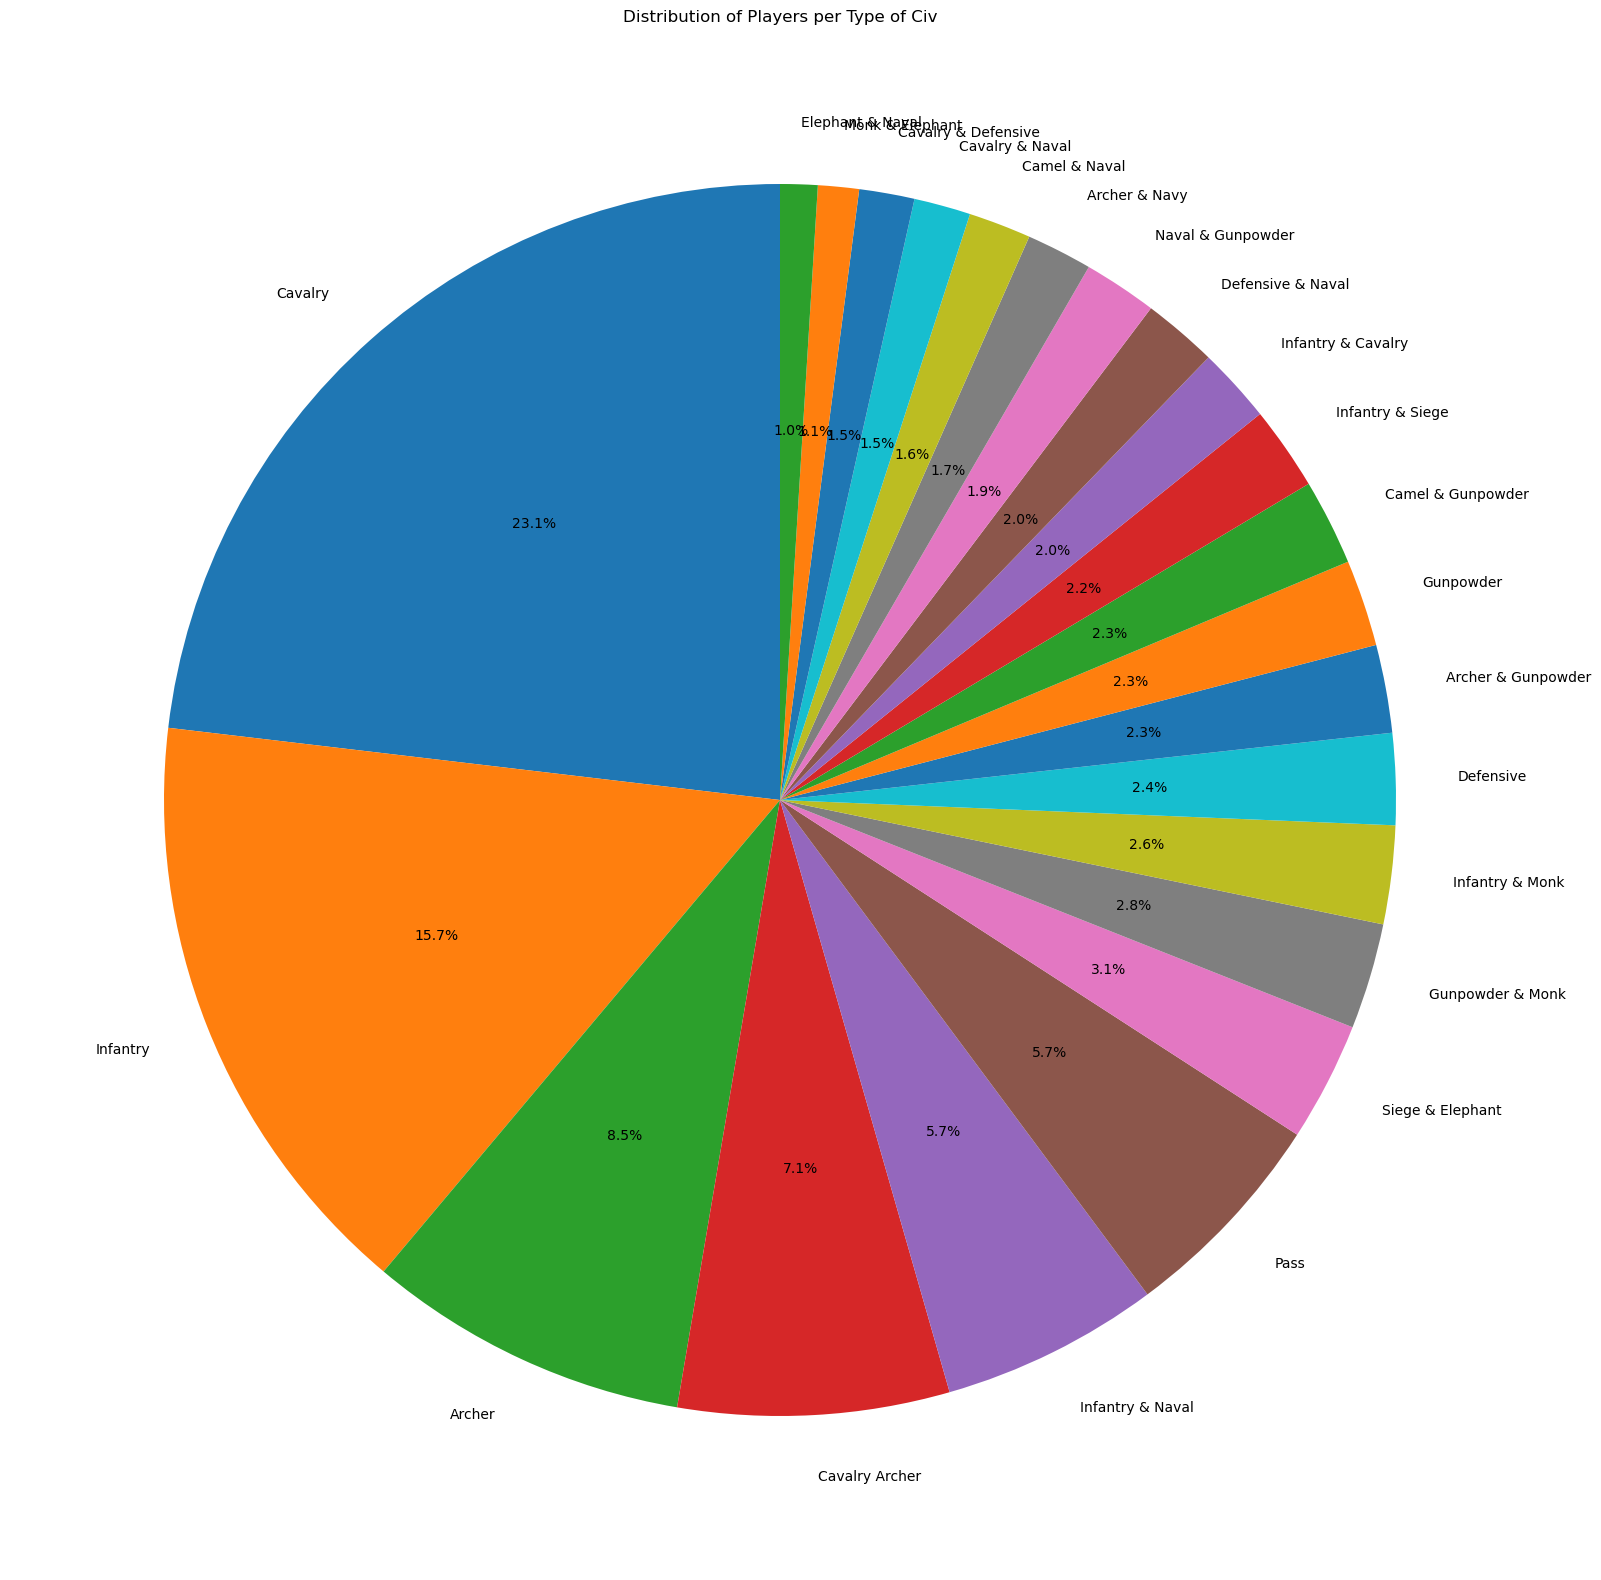

In [18]:
type_count = stats['type_of_civ'].value_counts()
# Plot a pie chart
plt.figure(figsize=(20, 20))
type_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Players per Type of Civ')
plt.ylabel('') # Remove default 'civ' label
plt.show()

## Doing some date time analysis
At this point - I think I have played around with the data enough and it could be time to work with some datetime analysis

In [ ]:
#Lets see which time of day is the most popular hour of the day for matches to start
stats['started_timestamp'].dt.hour